In [9]:
import numpy as np
import sklearn.datasets as skdata
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot, autocorrelation_plot
from matplotlib import pyplot


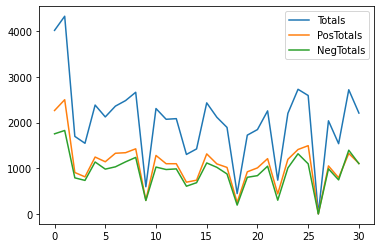

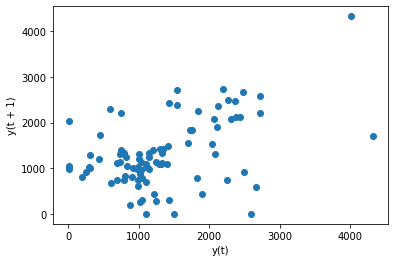

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5
Day t    1.000000  0.994896  0.991728  0.116100  0.149037  0.073252
Day t+1  0.994896  1.000000  0.973714  0.109707  0.145391  0.063579
Day t+2  0.991728  0.973714  1.000000  0.122517  0.151475  0.084476
Day t+3  0.116100  0.109707  0.122517  1.000000  0.994404  0.990983
Day t+4  0.149037  0.145391  0.151475  0.994404  1.000000  0.971282
Day t+5  0.073252  0.063579  0.084476  0.990983  0.971282  1.000000


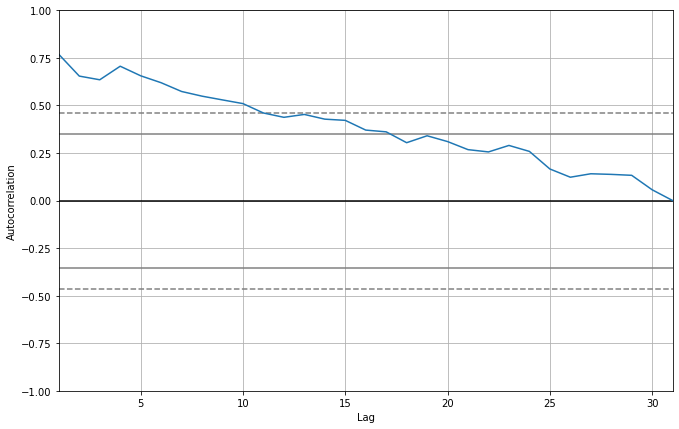

In [3]:
data=pd.read_csv('DemocracyMarch2022.csv')

X=data.iloc[:,1]
y=data.iloc[:,2:]


series=pd.read_csv('DemocracyMarch2022.csv', index_col=0)
#print(series)

df1=pd.DataFrame(series.iloc[:,1])
df2=pd.DataFrame(series.iloc[:,2])
df3=pd.DataFrame(series.iloc[:,3])

#print(df1, df2, df3)
Pos=[0]*len(df1)
Neg=[0]*len(df1)
for i in range(len(df1)):
    Pos[i]=float(df2.iloc[i])*float(df1.iloc[i])
    Neg[i]=float(df3.iloc[i])*float(df1.iloc[i])
dfPos=pd.DataFrame(Pos)
dfNeg=pd.DataFrame(Neg)
#print(dfPos,dfNeg)
series2= df1
series2['PosTotals'] = dfPos
series2['NegTotals'] = dfNeg

#print(series2)
series2.plot()
plt.savefig('SeriesPlotTest1.png')
plt.show()


lag_plot(series2)
plt.savefig('SeriesPlotTest2.png')
plt.show()


values= pd.DataFrame(series2.values)
df= pd.concat([values.shift(1),values],axis=1) #Append tomorrow's data with today's data
df.columns=['Day t','Day t+1','Day t+2','Day t+3','Day t+4','Day t+5']
result=df.corr()
print(result)

autocorrelation_plot(series)
plt.gcf().set_size_inches(11,7)
plt.savefig('SeriesPlotTest3.png')

plt.show()



In [4]:
totals=y.iloc[:,0]
print(totals)
pos=y.iloc[:,1]
neg=y.iloc[:,2]
totCorr=X.corr(totals)
posCorr=X.corr(pos)
negCorr=X.corr(neg)
corrArr1=[totCorr,posCorr,negCorr]
print(corrArr1)

0     4016.0
1     4325.0
2     1697.0
3     1546.0
4     2382.0
5     2123.0
6     2359.0
7     2480.0
8     2662.0
9      595.0
10    2306.0
11    2071.0
12    2085.0
13    1302.0
14    1423.0
15    2430.0
16    2115.0
17    1893.0
18     446.0
19    1724.0
20    1846.0
21    2255.0
22     740.0
23    2201.0
24    2727.0
25    2591.0
26       4.0
27    2038.0
28    1537.0
29    2717.0
30    2207.0
Name: Totals, dtype: float64
[-0.3156187643549845, 0.0500554484108456, -0.0500554484108455]


In [4]:
from sklearn import linear_model

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

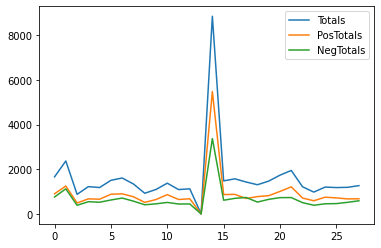

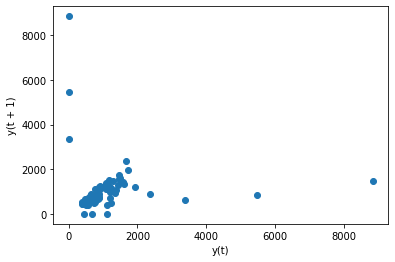

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000 -0.004542  0.108768 -0.143757  1.000000 -0.014880  0.090570   
Day t+1 -0.004542  1.000000  0.257582  0.122260 -0.004542 -0.165502  0.047491   
Day t+2  0.108768  0.257582  1.000000  0.790484  0.108768 -0.939755 -0.124239   
Day t+3 -0.143757  0.122260  0.790484  1.000000 -0.143757 -0.875116 -0.075908   
Day t+4  1.000000 -0.004542  0.108768 -0.143757  1.000000 -0.017553  0.092072   
Day t+5 -0.014880 -0.165502 -0.939755 -0.875116 -0.017553  1.000000  0.258608   
Day t+6  0.090570  0.047491 -0.124239 -0.075908  0.092072  0.258608  1.000000   
Day t+7 -0.064237  0.073144 -0.016408  0.152857 -0.094792  0.116037  0.779596   

          Day t+7  
Day t   -0.064237  
Day t+1  0.073144  
Day t+2 -0.016408  
Day t+3  0.152857  
Day t+4 -0.094792  
Day t+5  0.116037  
Day t+6  0.779596  
Day t+7  1.000000  


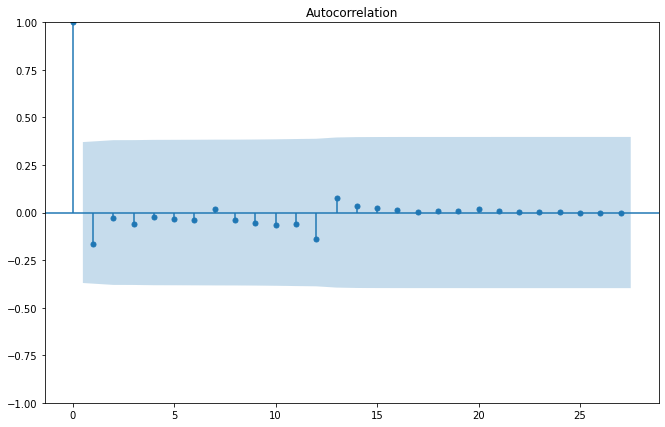

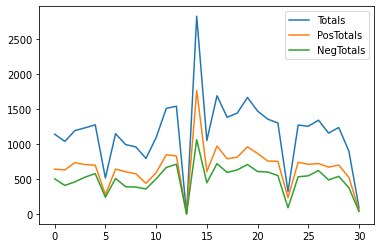

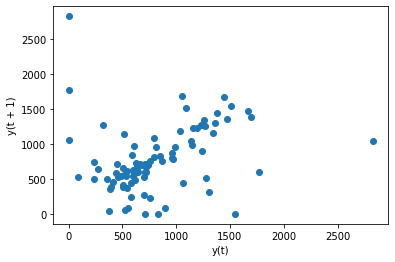

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000  0.099228  0.061495 -0.011428  1.000000 -0.037669  0.074736   
Day t+1  0.099228  1.000000  0.409296  0.479697  0.099228 -0.247501 -0.159318   
Day t+2  0.061495  0.409296  1.000000  0.720410  0.061495 -0.548066 -0.028188   
Day t+3 -0.011428  0.479697  0.720410  1.000000 -0.011428 -0.573100 -0.201835   
Day t+4  1.000000  0.099228  0.061495 -0.011428  1.000000 -0.032995  0.070261   
Day t+5 -0.037669 -0.247501 -0.548066 -0.573100 -0.032995  1.000000  0.361280   
Day t+6  0.074736 -0.159318 -0.028188 -0.201835  0.070261  0.361280  1.000000   
Day t+7  0.017204 -0.076950  0.108677  0.012141 -0.004381  0.432974  0.720531   

          Day t+7  
Day t    0.017204  
Day t+1 -0.076950  
Day t+2  0.108677  
Day t+3  0.012141  
Day t+4 -0.004381  
Day t+5  0.432974  
Day t+6  0.720531  
Day t+7  1.000000  


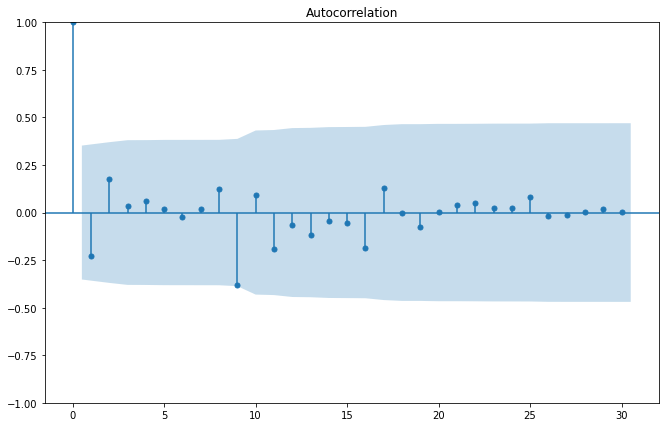

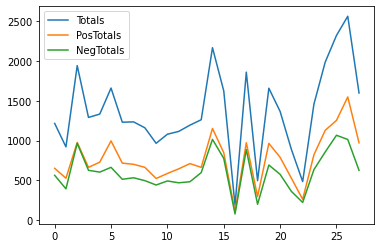

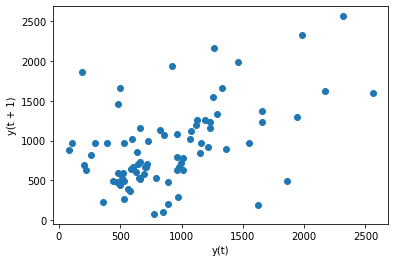

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000  0.224643  0.271666 -0.271666  1.000000  0.234069  0.312262   
Day t+1  0.224643  1.000000 -0.179554  0.179554  0.224643  0.131941  0.283015   
Day t+2  0.271666 -0.179554  1.000000 -1.000000  0.271666  0.061104  0.172127   
Day t+3 -0.271666  0.179554 -1.000000  1.000000 -0.271666 -0.061104 -0.172127   
Day t+4  1.000000  0.224643  0.271666 -0.271666  1.000000  0.238694  0.344089   
Day t+5  0.234069  0.131941  0.061104 -0.061104  0.238694  1.000000 -0.144467   
Day t+6  0.312262  0.283015  0.172127 -0.172127  0.344089 -0.144467  1.000000   
Day t+7 -0.312262 -0.283015 -0.172127  0.172127 -0.344089  0.144467 -1.000000   

          Day t+7  
Day t   -0.312262  
Day t+1 -0.283015  
Day t+2 -0.172127  
Day t+3  0.172127  
Day t+4 -0.344089  
Day t+5  0.144467  
Day t+6 -1.000000  
Day t+7  1.000000  


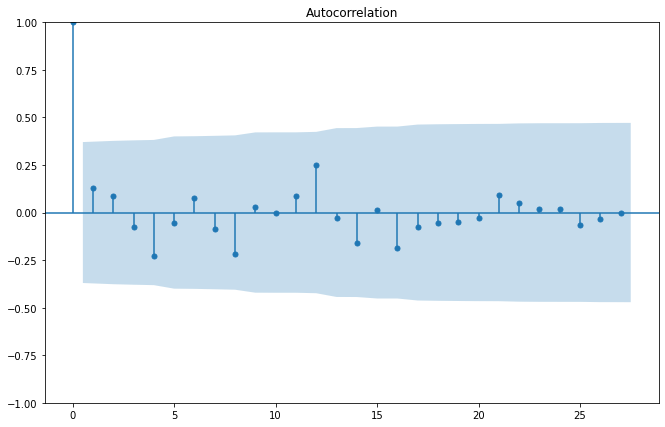

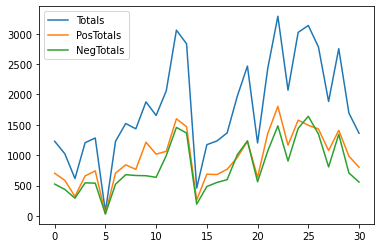

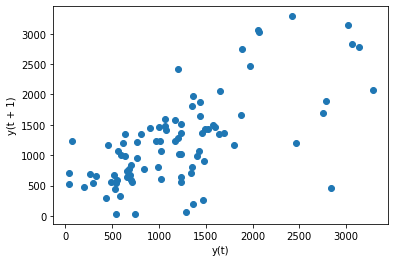

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000  0.612341 -0.247769  0.247769  1.000000  0.543334 -0.142284   
Day t+1  0.612341  1.000000 -0.327672  0.327672  0.612341  0.491731 -0.220501   
Day t+2 -0.247769 -0.327672  1.000000 -1.000000 -0.247769 -0.227355  0.182857   
Day t+3  0.247769  0.327672 -1.000000  1.000000  0.247769  0.227355 -0.182857   
Day t+4  1.000000  0.612341 -0.247769  0.247769  1.000000  0.551275 -0.169930   
Day t+5  0.543334  0.491731 -0.227355  0.227355  0.551275  1.000000 -0.338563   
Day t+6 -0.142284 -0.220501  0.182857 -0.182857 -0.169930 -0.338563  1.000000   
Day t+7  0.142284  0.220501 -0.182857  0.182857  0.169930  0.338563 -1.000000   

          Day t+7  
Day t    0.142284  
Day t+1  0.220501  
Day t+2 -0.182857  
Day t+3  0.182857  
Day t+4  0.169930  
Day t+5  0.338563  
Day t+6 -1.000000  
Day t+7  1.000000  


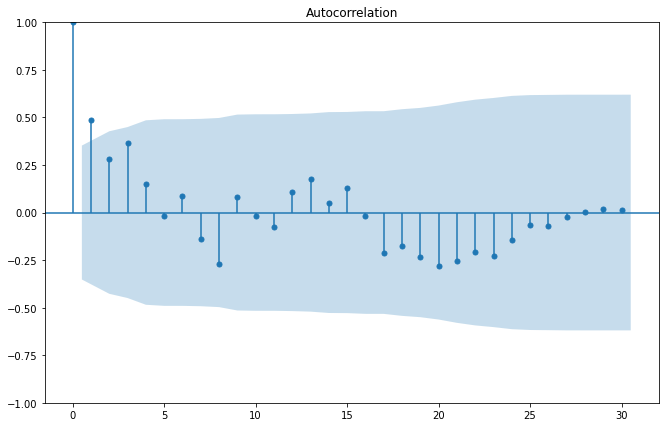

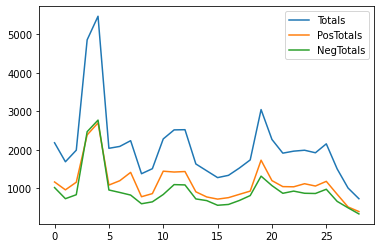

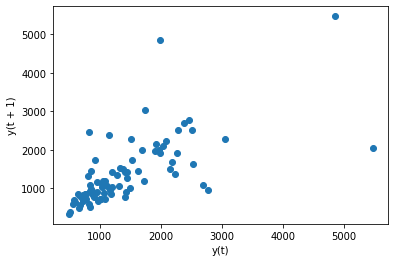

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000 -0.368440 -0.121797  0.121797  1.000000 -0.436313 -0.188323   
Day t+1 -0.368440  1.000000 -0.369023  0.369023 -0.368440  0.500726 -0.330728   
Day t+2 -0.121797 -0.369023  1.000000 -1.000000 -0.121797 -0.119563  0.282550   
Day t+3  0.121797  0.369023 -1.000000  1.000000  0.121797  0.119563 -0.282550   
Day t+4  1.000000 -0.368440 -0.121797  0.121797  1.000000 -0.420379 -0.138134   
Day t+5 -0.436313  0.500726 -0.119563  0.119563 -0.420379  1.000000 -0.336075   
Day t+6 -0.188323 -0.330728  0.282550 -0.282550 -0.138134 -0.336075  1.000000   
Day t+7  0.188323  0.330728 -0.282550  0.282550  0.138134  0.336075 -1.000000   

          Day t+7  
Day t    0.188323  
Day t+1  0.330728  
Day t+2 -0.282550  
Day t+3  0.282550  
Day t+4  0.138134  
Day t+5  0.336075  
Day t+6 -1.000000  
Day t+7  1.000000  


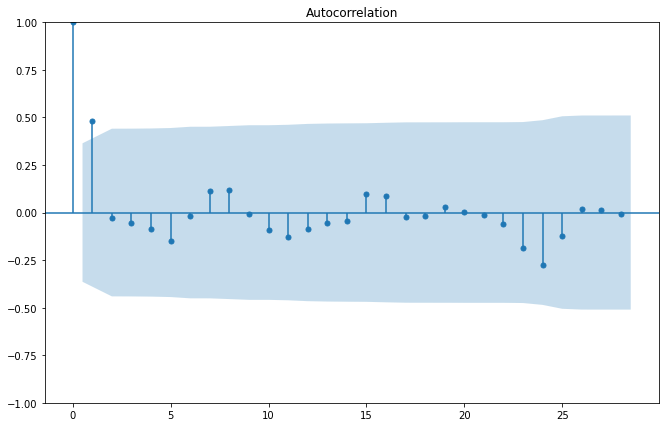

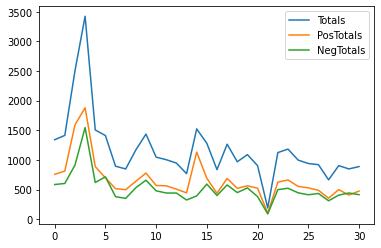

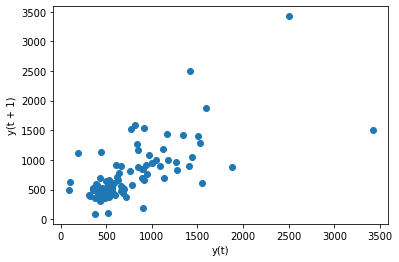

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000 -0.543882 -0.287836  0.287836  1.000000 -0.553941 -0.305295   
Day t+1 -0.543882  1.000000  0.273187 -0.273187 -0.543882  0.526446  0.039493   
Day t+2 -0.287836  0.273187  1.000000 -1.000000 -0.287836  0.387795  0.024938   
Day t+3  0.287836 -0.273187 -1.000000  1.000000  0.287836 -0.387795 -0.024938   
Day t+4  1.000000 -0.543882 -0.287836  0.287836  1.000000 -0.543757 -0.300377   
Day t+5 -0.553941  0.526446  0.387795 -0.387795 -0.543757  1.000000  0.279192   
Day t+6 -0.305295  0.039493  0.024938 -0.024938 -0.300377  0.279192  1.000000   
Day t+7  0.305295 -0.039493 -0.024938  0.024938  0.300377 -0.279192 -1.000000   

          Day t+7  
Day t    0.305295  
Day t+1 -0.039493  
Day t+2 -0.024938  
Day t+3  0.024938  
Day t+4  0.300377  
Day t+5 -0.279192  
Day t+6 -1.000000  
Day t+7  1.000000  


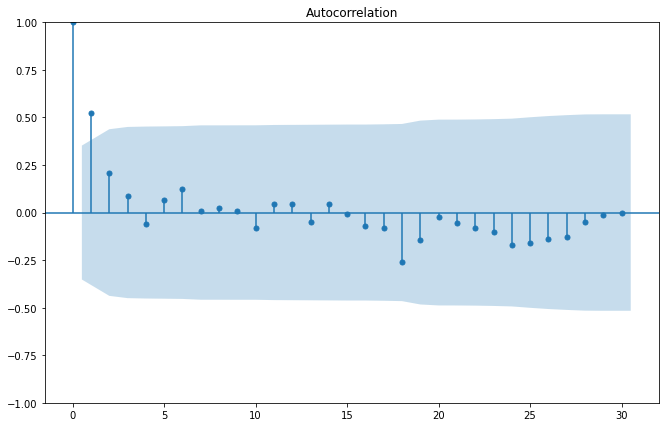

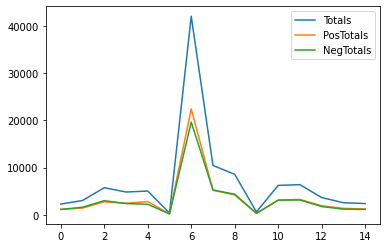

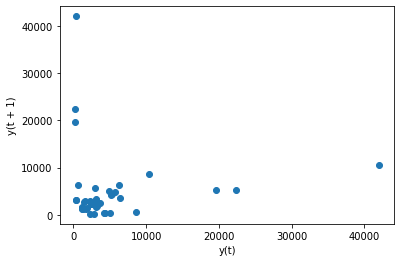

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000 -0.002564  0.309434 -0.309434  1.000000 -0.125142  0.341627   
Day t+1 -0.002564  1.000000  0.277659 -0.277659 -0.002564 -0.021231 -0.168434   
Day t+2  0.309434  0.277659  1.000000 -1.000000  0.309434  0.020118  0.413060   
Day t+3 -0.309434 -0.277659 -1.000000  1.000000 -0.309434 -0.020118 -0.413060   
Day t+4  1.000000 -0.002564  0.309434 -0.309434  1.000000 -0.056485  0.344568   
Day t+5 -0.125142 -0.021231  0.020118 -0.020118 -0.056485  1.000000  0.251920   
Day t+6  0.341627 -0.168434  0.413060 -0.413060  0.344568  0.251920  1.000000   
Day t+7 -0.341627  0.168434 -0.413060  0.413060 -0.344568 -0.251920 -1.000000   

          Day t+7  
Day t   -0.341627  
Day t+1  0.168434  
Day t+2 -0.413060  
Day t+3  0.413060  
Day t+4 -0.344568  
Day t+5 -0.251920  
Day t+6 -1.000000  
Day t+7  1.000000  


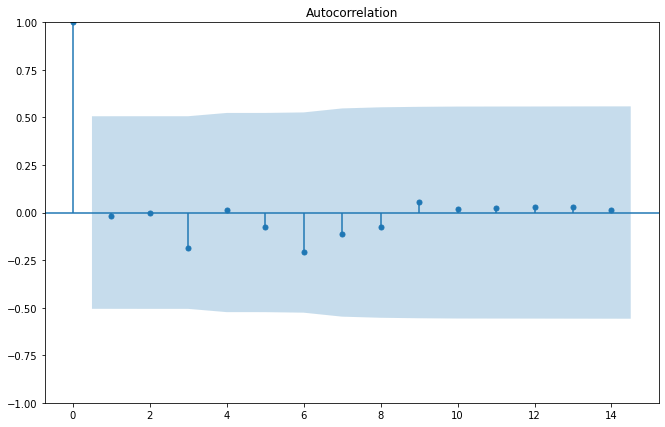

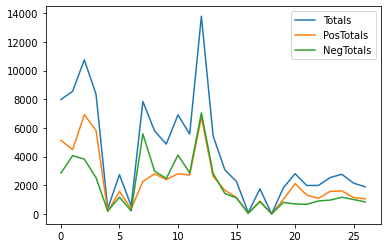

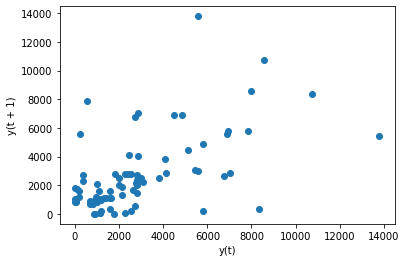

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000 -0.533301  0.109203 -0.109203  1.000000 -0.512984  0.196469   
Day t+1 -0.533301  1.000000 -0.113295  0.113295 -0.533301  0.503870 -0.019965   
Day t+2  0.109203 -0.113295  1.000000 -1.000000  0.109203 -0.171414  0.232010   
Day t+3 -0.109203  0.113295 -1.000000  1.000000 -0.109203  0.171414 -0.232010   
Day t+4  1.000000 -0.533301  0.109203 -0.109203  1.000000 -0.543300  0.112052   
Day t+5 -0.512984  0.503870 -0.171414  0.171414 -0.543300  1.000000 -0.115879   
Day t+6  0.196469 -0.019965  0.232010 -0.232010  0.112052 -0.115879  1.000000   
Day t+7 -0.196469  0.019965 -0.232010  0.232010 -0.112052  0.115879 -1.000000   

          Day t+7  
Day t   -0.196469  
Day t+1  0.019965  
Day t+2 -0.232010  
Day t+3  0.232010  
Day t+4 -0.112052  
Day t+5  0.115879  
Day t+6 -1.000000  
Day t+7  1.000000  


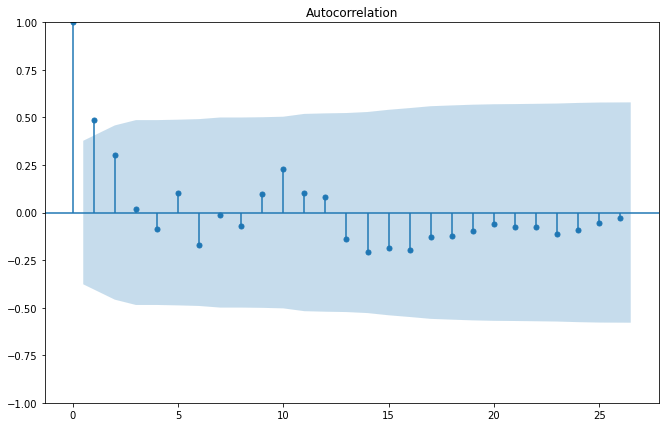

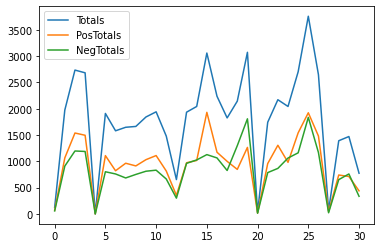

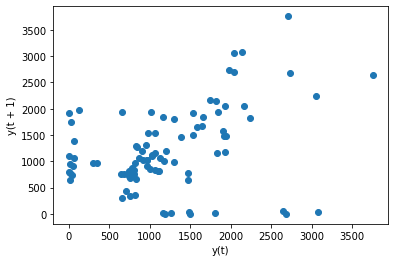

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000  0.146181  0.142841  0.252595  1.000000 -0.030212  0.177112   
Day t+1  0.146181  1.000000  0.228644  0.423457  0.146181  0.071201 -0.138589   
Day t+2  0.142841  0.228644  1.000000  0.488122  0.142841 -0.027527 -0.093148   
Day t+3  0.252595  0.423457  0.488122  1.000000  0.252595  0.004009 -0.072180   
Day t+4  1.000000  0.146181  0.142841  0.252595  1.000000  0.074415  0.158023   
Day t+5 -0.030212  0.071201 -0.027527  0.004009  0.074415  1.000000  0.208538   
Day t+6  0.177112 -0.138589 -0.093148 -0.072180  0.158023  0.208538  1.000000   
Day t+7  0.252940 -0.167082 -0.003729  0.088115  0.233833  0.418964  0.485130   

          Day t+7  
Day t    0.252940  
Day t+1 -0.167082  
Day t+2 -0.003729  
Day t+3  0.088115  
Day t+4  0.233833  
Day t+5  0.418964  
Day t+6  0.485130  
Day t+7  1.000000  


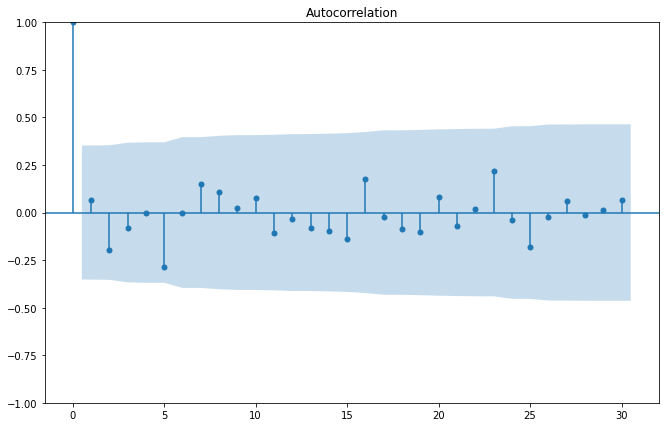

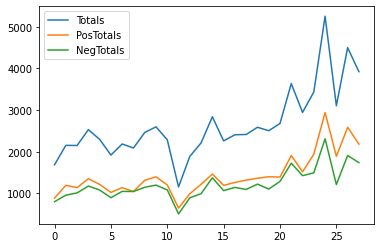

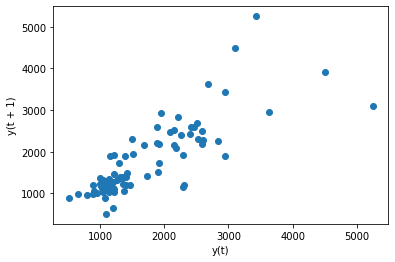

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000  0.696512  0.431028 -0.431028  1.000000  0.707996  0.440993   
Day t+1  0.696512  1.000000  0.361594 -0.361594  0.696512  0.586891  0.568660   
Day t+2  0.431028  0.361594  1.000000 -1.000000  0.431028  0.537060  0.337601   
Day t+3 -0.431028 -0.361594 -1.000000  1.000000 -0.431028 -0.537060 -0.337601   
Day t+4  1.000000  0.696512  0.431028 -0.431028  1.000000  0.724625  0.452747   
Day t+5  0.707996  0.586891  0.537060 -0.537060  0.724625  1.000000  0.386621   
Day t+6  0.440993  0.568660  0.337601 -0.337601  0.452747  0.386621  1.000000   
Day t+7 -0.440993 -0.568660 -0.337601  0.337601 -0.452747 -0.386621 -1.000000   

          Day t+7  
Day t   -0.440993  
Day t+1 -0.568660  
Day t+2 -0.337601  
Day t+3  0.337601  
Day t+4 -0.452747  
Day t+5 -0.386621  
Day t+6 -1.000000  
Day t+7  1.000000  


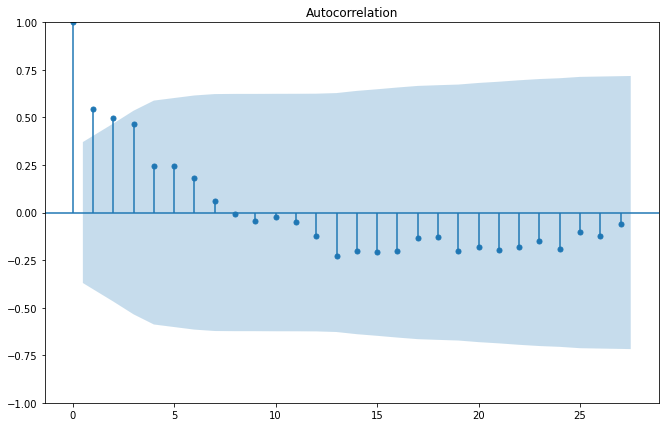

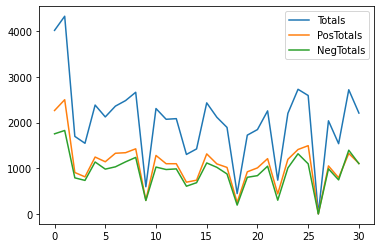

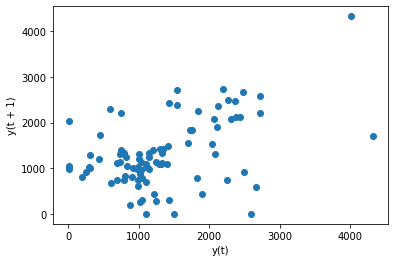

            Day t   Day t+1   Day t+2   Day t+3   Day t+4   Day t+5   Day t+6  \
Day t    1.000000 -0.343872  0.110124 -0.110124  1.000000 -0.217532  0.079407   
Day t+1 -0.343872  1.000000 -0.292258  0.292258 -0.343872  0.116100  0.197313   
Day t+2  0.110124 -0.292258  1.000000 -1.000000  0.110124 -0.021769  0.097978   
Day t+3 -0.110124  0.292258 -1.000000  1.000000 -0.110124  0.021769 -0.097978   
Day t+4  1.000000 -0.343872  0.110124 -0.110124  1.000000 -0.315619  0.050055   
Day t+5 -0.217532  0.116100 -0.021769  0.021769 -0.315619  1.000000 -0.294139   
Day t+6  0.079407  0.197313  0.097978 -0.097978  0.050055 -0.294139  1.000000   
Day t+7 -0.079407 -0.197313 -0.097978  0.097978 -0.050055  0.294139 -1.000000   

          Day t+7  
Day t   -0.079407  
Day t+1 -0.197313  
Day t+2 -0.097978  
Day t+3  0.097978  
Day t+4 -0.050055  
Day t+5  0.294139  
Day t+6 -1.000000  
Day t+7  1.000000  


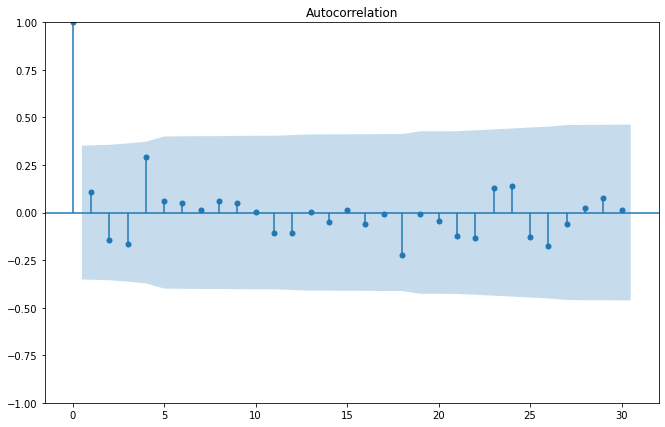

In [21]:
files= ['DemocracyFeb2018.csv','DemocracyMarch2018.csv','DemocracyFeb2019.csv','DemocracyMarch2019.csv','DemocracyFeb2020.csv','DemocracyMarch2020.csv','DemocracyJan2021.csv','DemocracyFeb2021.csv','DemocracyMarch2021.csv','DemocracyFeb2022.csv','DemocracyMarch2022.csv',]



for i in range(0,len(files)):
    data=pd.read_csv(files[i])

    X=data.iloc[:,1]
    y=data.iloc[:,2:]


    series=pd.read_csv(files[i], index_col=0)


    df1=pd.DataFrame(series.iloc[:,1])
    df2=pd.DataFrame(series.iloc[:,2])
    df3=pd.DataFrame(series.iloc[:,3])


    Pos=[0]*len(df1)
    Neg=[0]*len(df1)
    for j in range(len(df1)):
        Pos[j]=float(df2.iloc[j])*float(df1.iloc[j])
        Neg[j]=float(df3.iloc[j])*float(df1.iloc[j])
    dfPos=pd.DataFrame(Pos)
    dfNeg=pd.DataFrame(Neg)

    series2= df1
    series2['PosTotals'] = dfPos
    series2['NegTotals'] = dfNeg


    series2.plot()
    plt.savefig('SeriesPlot'+files[i].replace('csv','png'))
    plt.show()
    

    lag_plot(series2)
    plt.savefig('LagPlot'+files[i].replace('csv','png'))
    plt.show()
    

    values= pd.DataFrame(series.values)
    df= pd.concat([values.shift(1),values],axis=1) #Append tomorrow's data with today's data
    df.columns=['Day t','Day t+1','Day t+2','Day t+3','Day t+4','Day t+5','Day t+6','Day t+7']
    result=df.corr()
    print(result)
    df.to_csv('Results'+files[i])
    
    series3=series.iloc[:,1]
    plot_acf(series3,lags=len(df1)-1)
    plt.gcf().set_size_inches(11,7)
    plt.savefig('AutoCorrPlot'+files[i].replace('csv','png'))
    plt.show()
    if i==len(files)-1:
        break
    
    




In [12]:
lr = linear_model.LinearRegression()
lr.fit(df1.iloc[:,0:1], dfPos)
lr2=linear_model.LinearRegression()
data2=pd.read_csv('DemocracyMarch2021.csv')
lr2.fit(data.iloc[:,2:],data2.iloc[:,2:])
print()
print(lr.coef_)
print(lr2.coef_)


[[0.55999548]]
[[-1.69509811e-01  2.25009397e+03 -2.25009397e+03]
 [ 3.90913781e-06  1.21506412e-01 -1.21506412e-01]
 [-1.46996398e-05  2.01729185e-02 -2.01729185e-02]]
